In [ ]:
from google.colab import files
from google.colab import drive
import pandas as pd
drive.mount('/content/drive/')
path_ds = "/content/drive/MyDrive/FAI assignment/creditcard.csv"
df = pd.read_csv(path_ds)
print("Shape of the dataset = ", df.shape)
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Shape of the dataset =  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

## Distribution Over Classes

In [ ]:
import matplotlib.pyplot as plt
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

It is an imbalanced dataset.

## Histograms of each feature

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

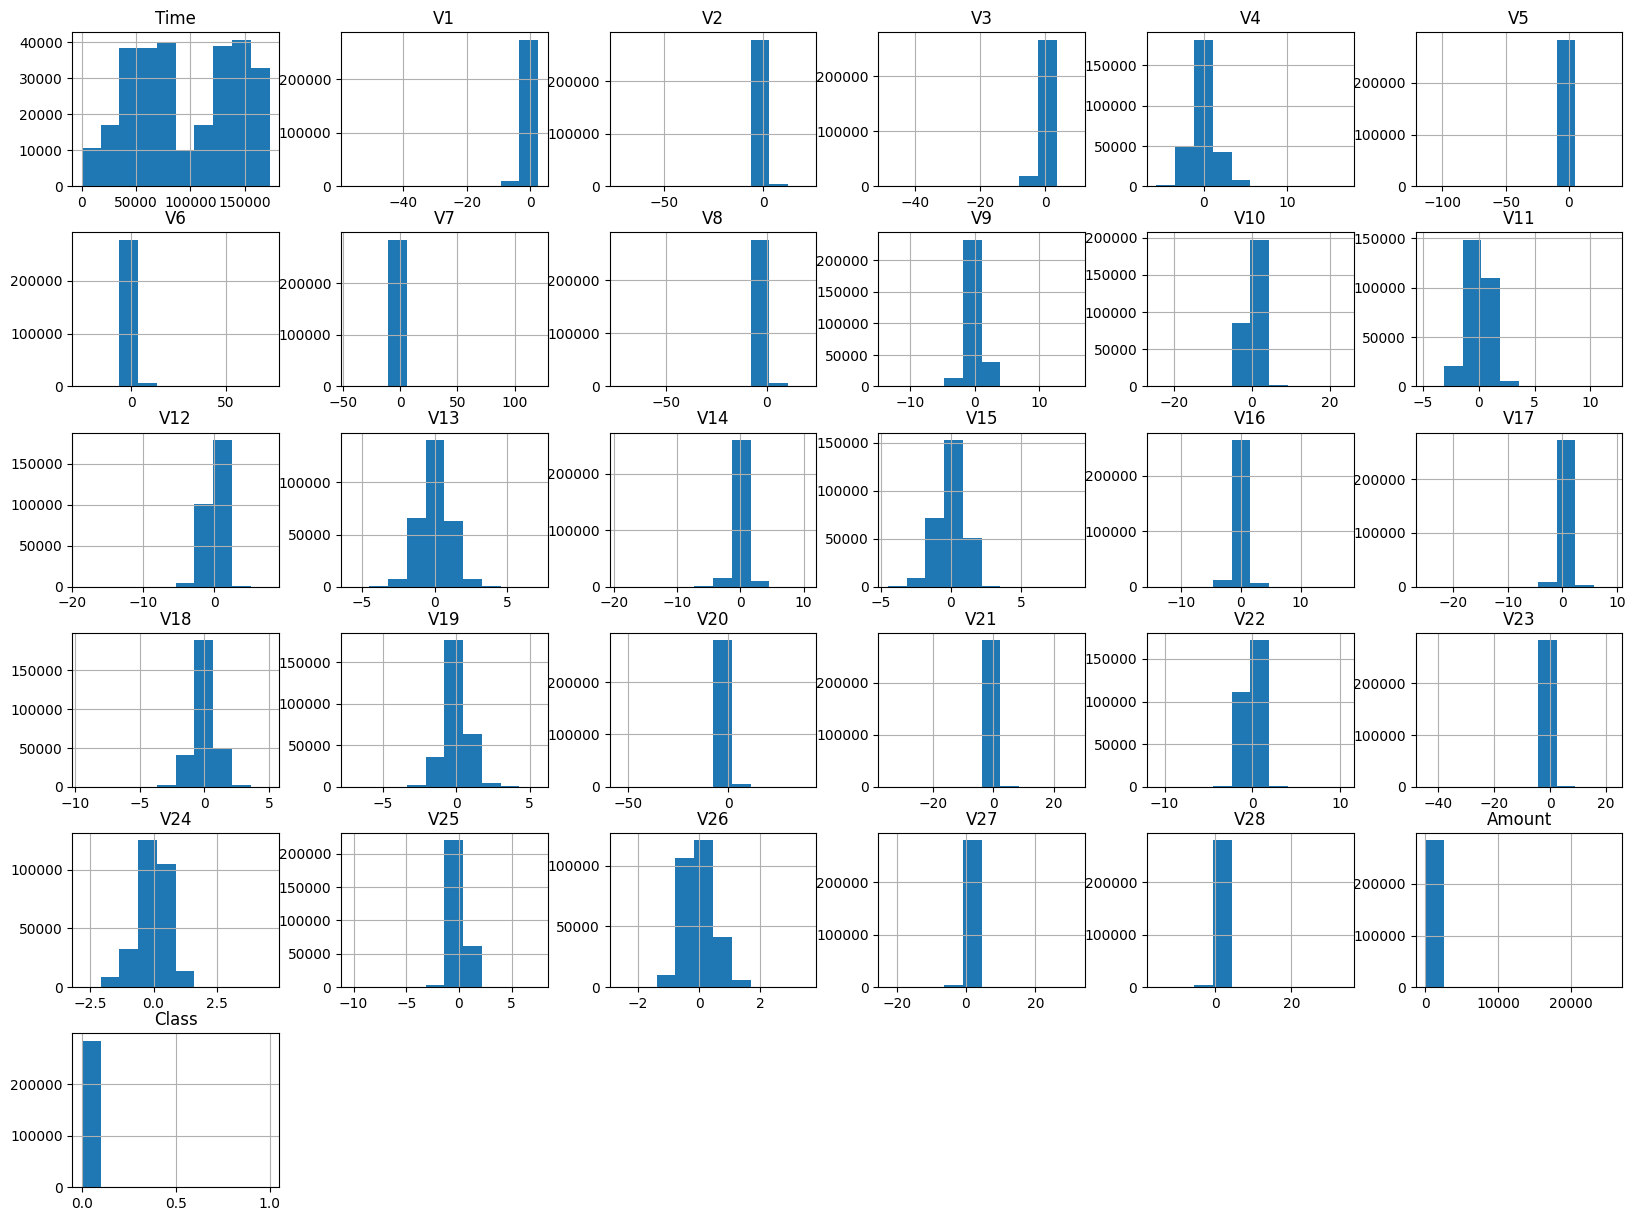

In [ ]:
df.hist(figsize=(20,15))

Class
0    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
1    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
dtype: object

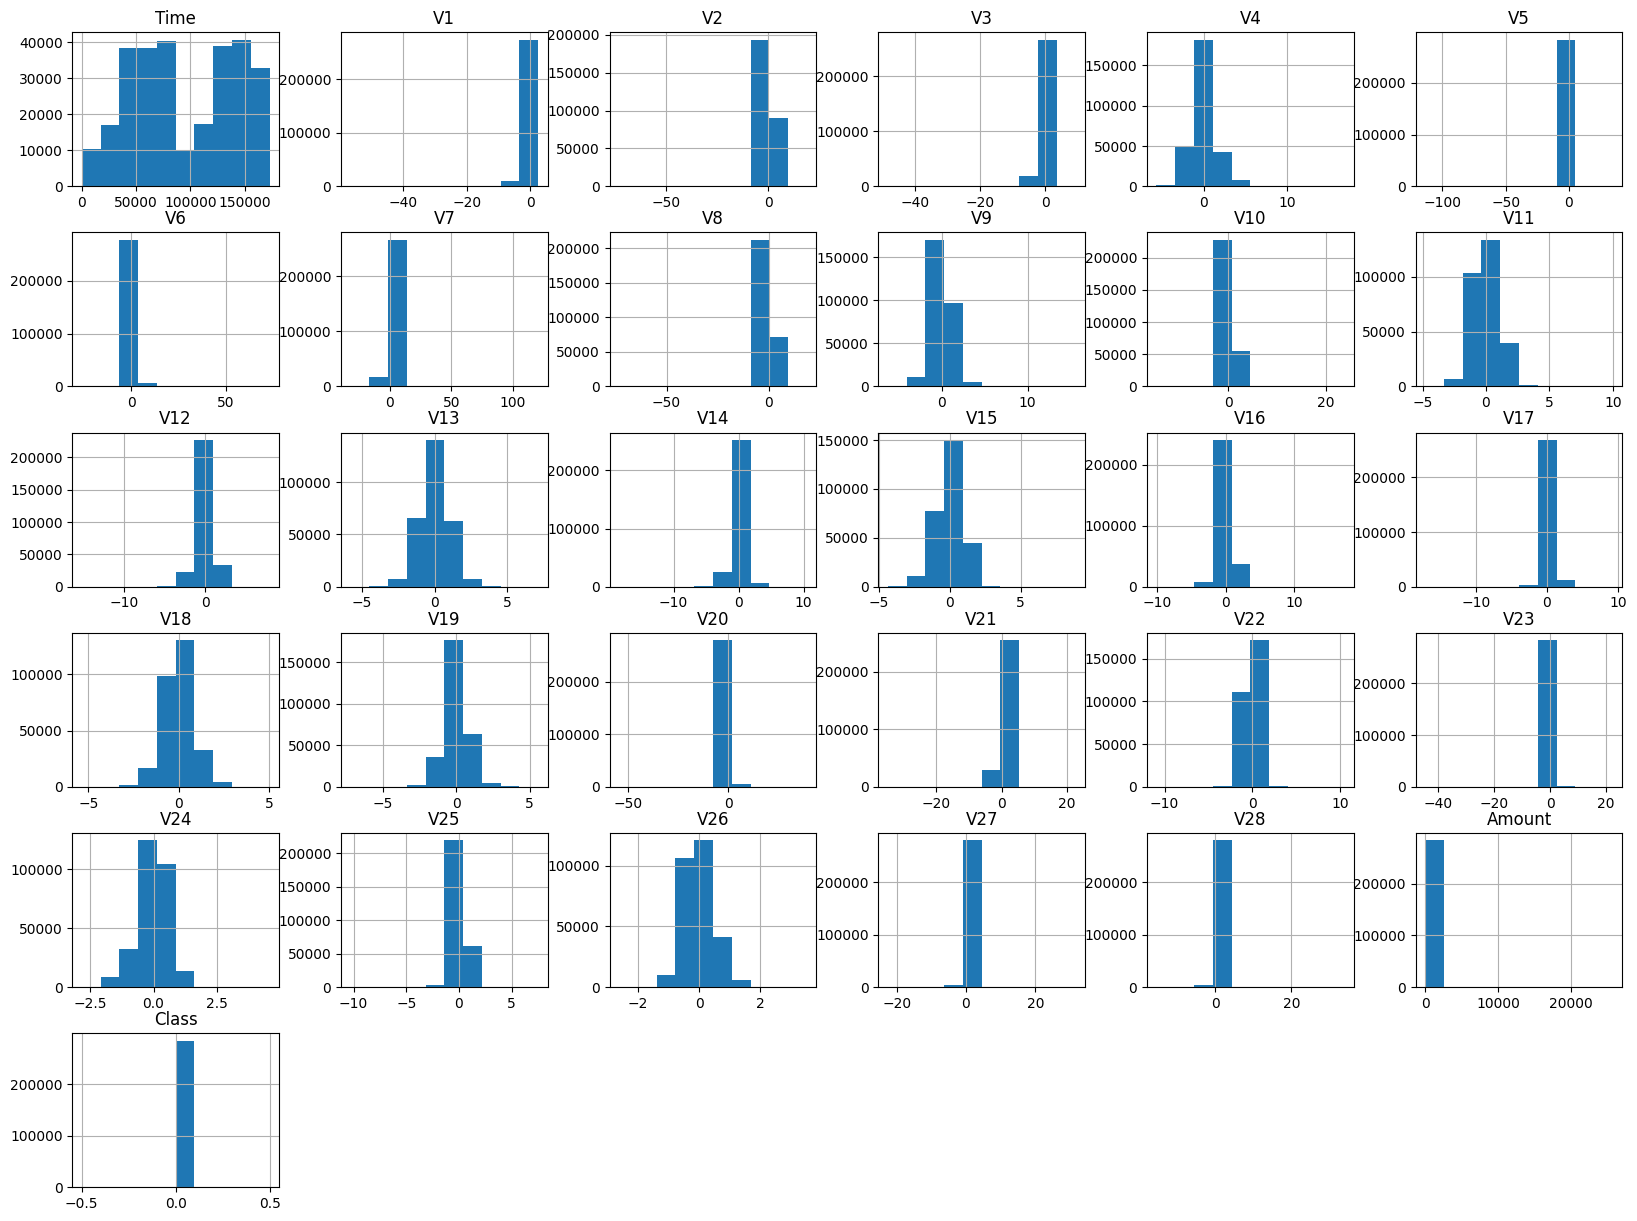

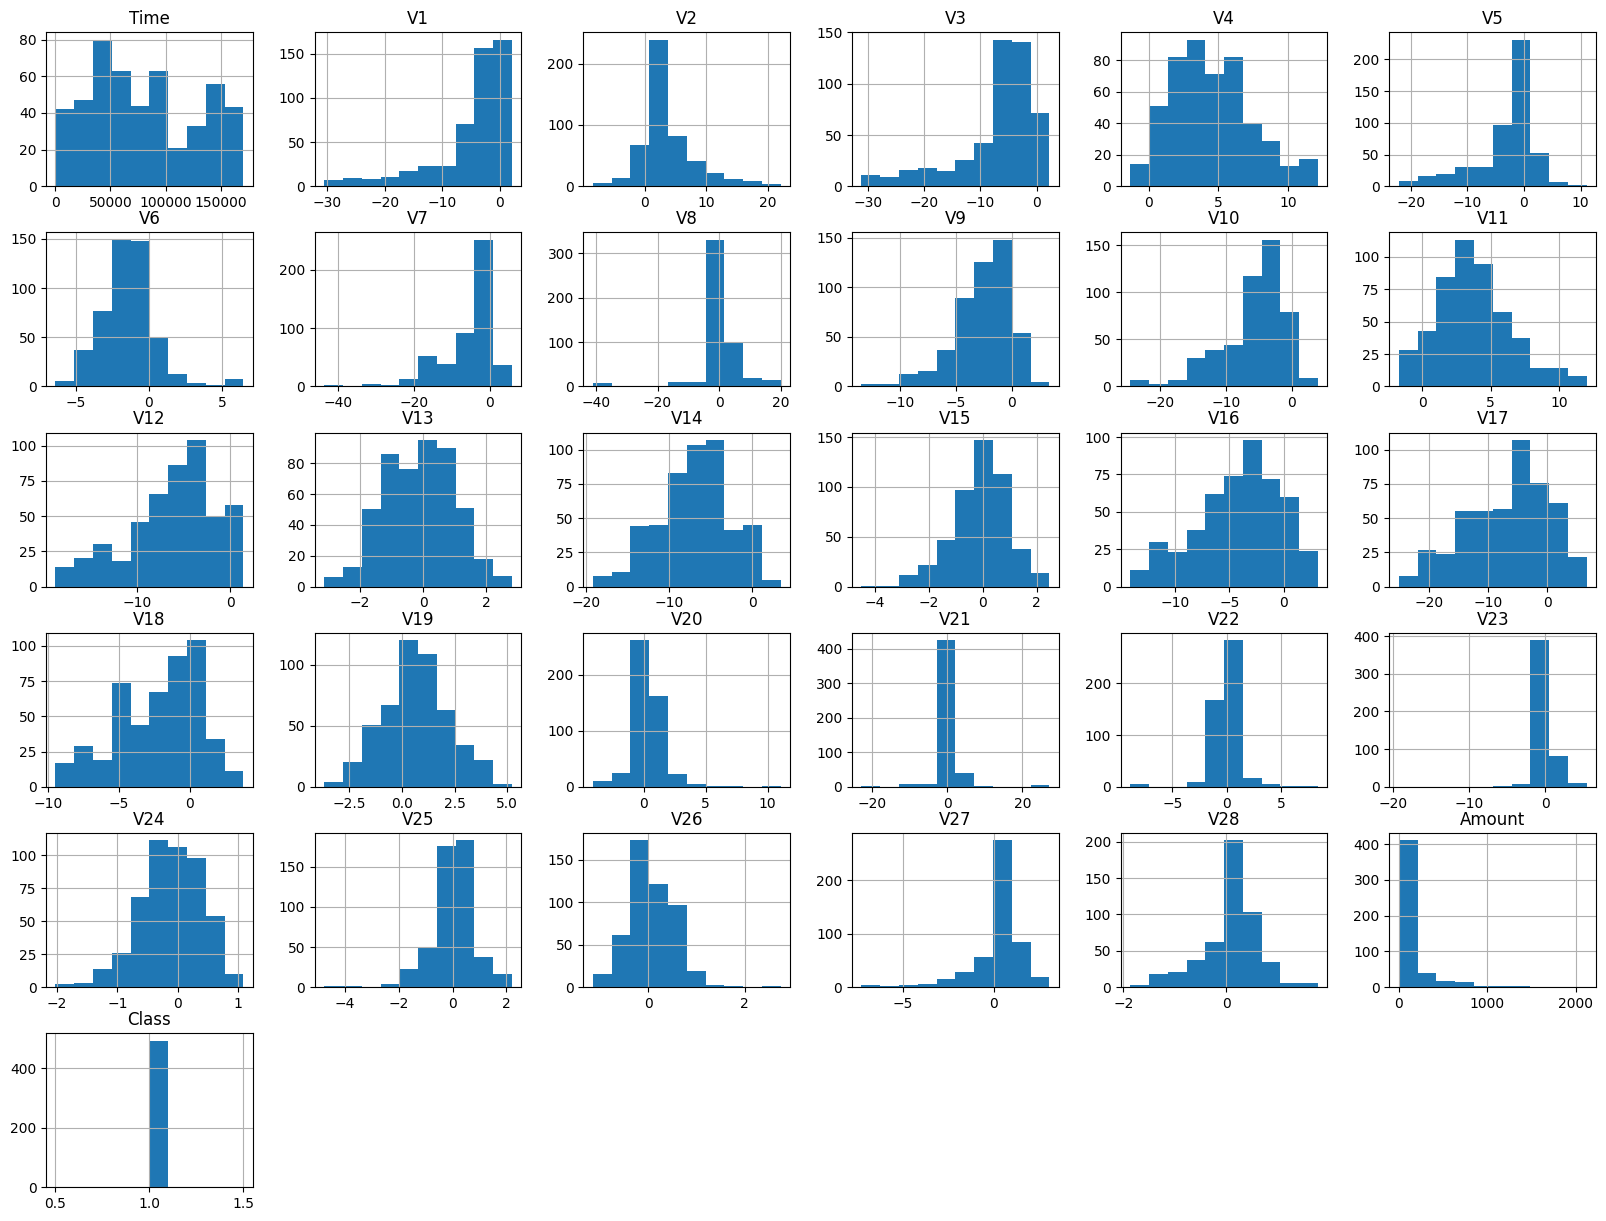

In [ ]:
# for each class, generate the histogram for each feature
df.groupby('Class').hist(figsize=(20,15))

## Scatter Plot

In [ ]:
# dropping Time attribute as we are not working on time-series forecasting
# from pandas.plotting import scatter_matrix
# scatter_matrix(df.drop(columns=["Time", "Class"]), alpha=0.2, figsize=(20, 15), diagonal='kde')

## Correlation Matrix

The threshold value to identify two highly correlated variables is set to 0.75 by our team, as the threshold value normally set in data science industry is from 0.70 to 0.80.

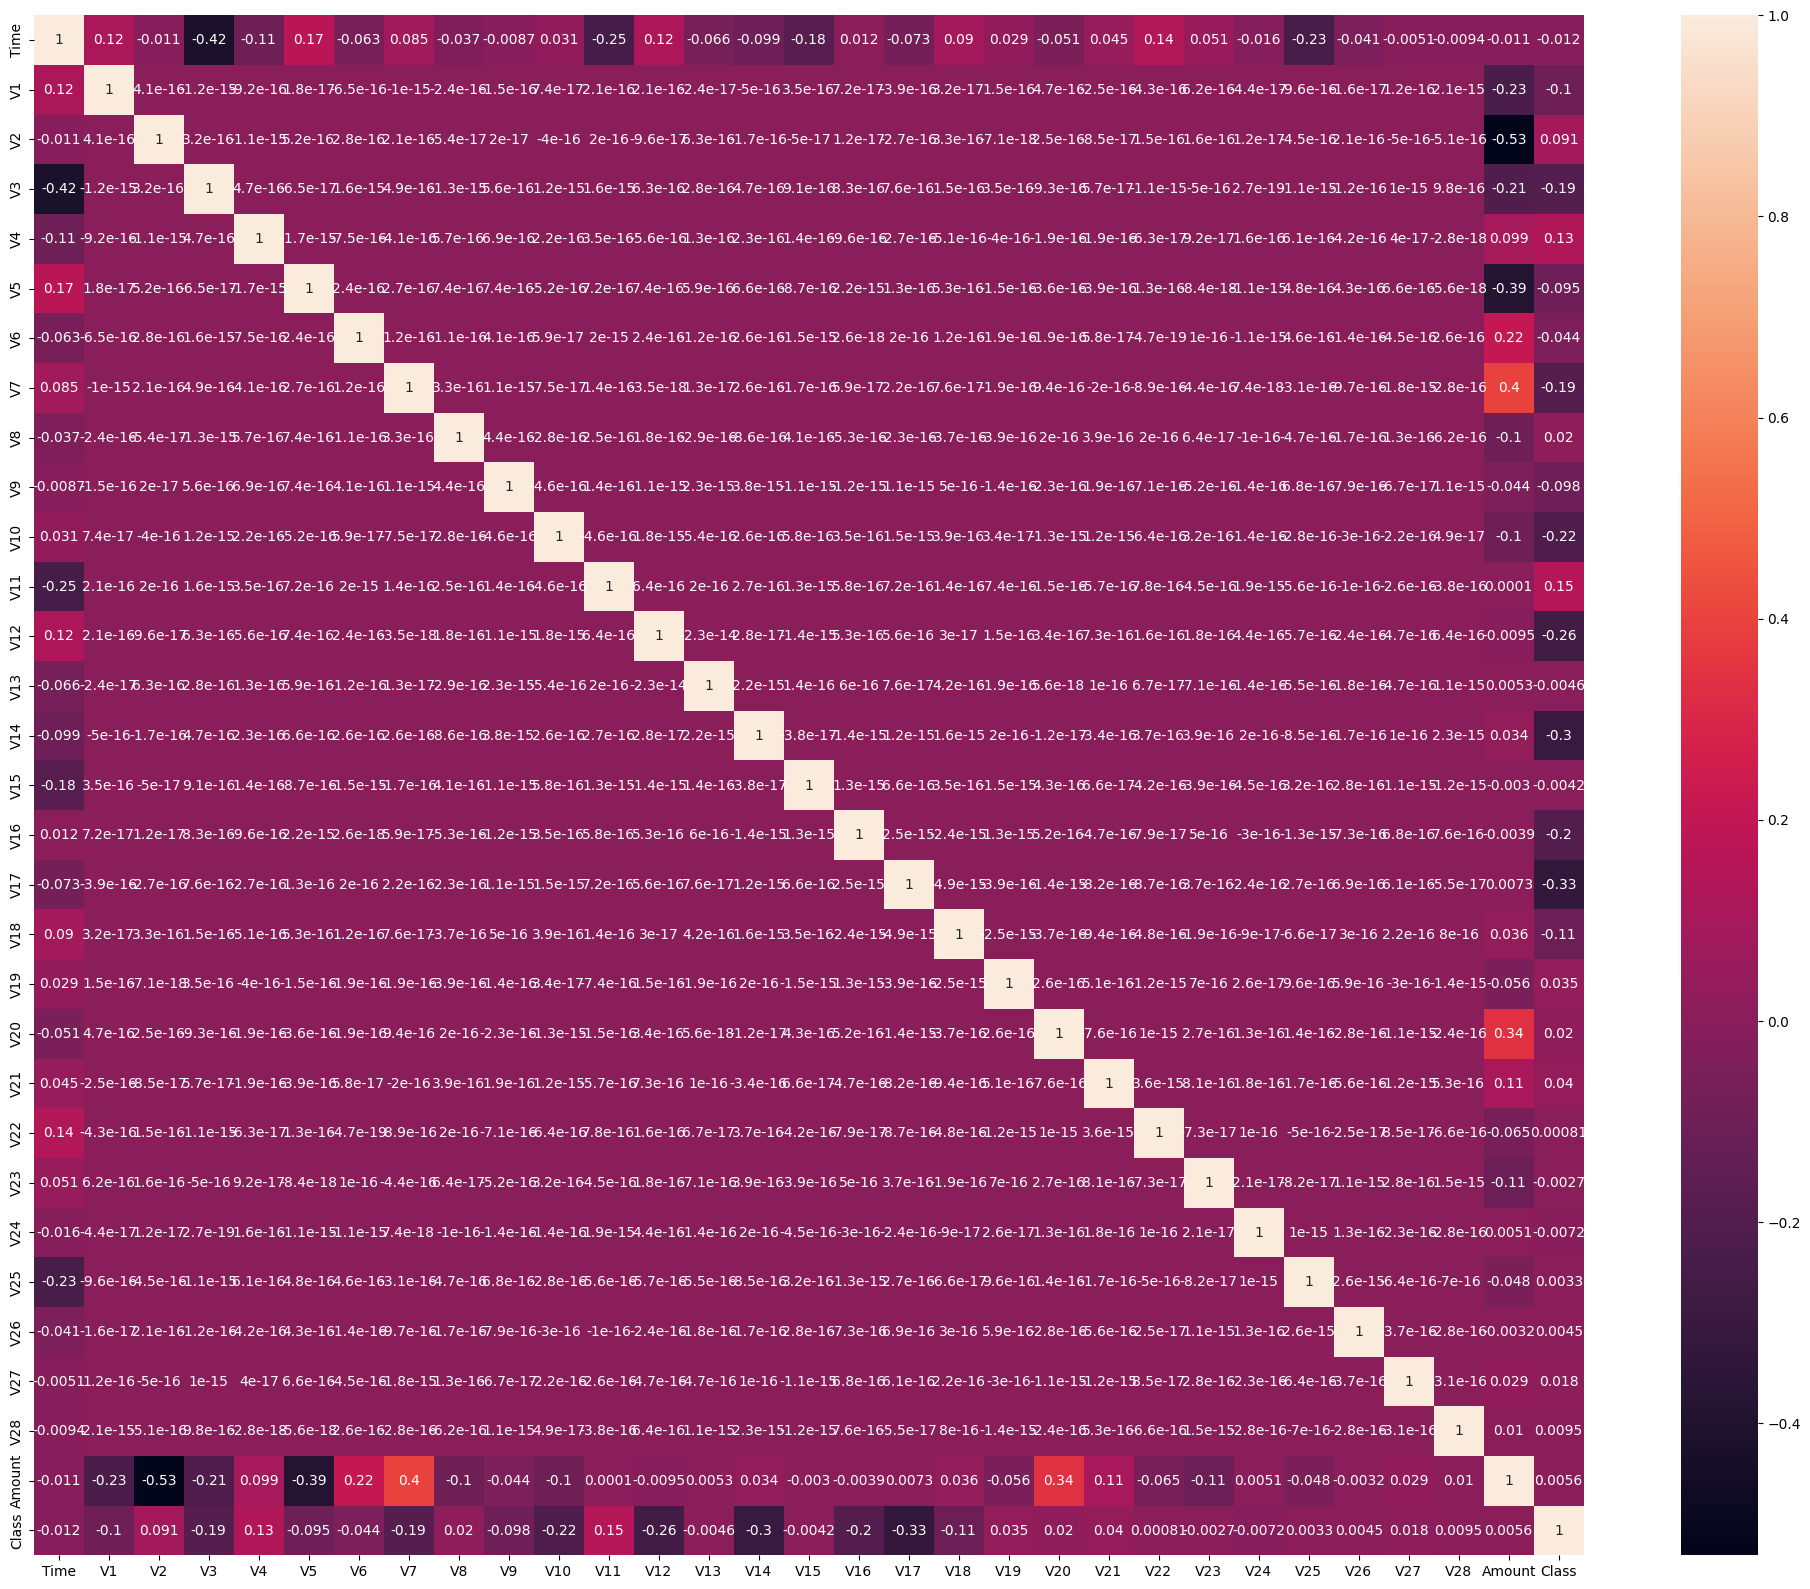

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df.corr()
plt.subplots(figsize=(25,20))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
threshold = 0.75  # threshold for highly correlated variables
count_highly_correlated = 0
corrMatrix_numpy = corrMatrix.to_numpy()
for row_index in range(len(corrMatrix_numpy)):
    for col_index in range(len(corrMatrix_numpy[0])):
        if row_index != col_index:
            if corrMatrix_numpy[row_index][col_index] >= threshold:
                print(f"The variables at ({str(row_index)}, {str(col_index)}) are highly correlated!")
                count_highly_correlated = count_highly_correlated + 1
if count_highly_correlated == 0:
    print("There is no variables that are highly correlated!")

There is no variables that are highly correlated!


## Missing Data Analysis

In [ ]:
# check for NULL values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Check for NULL values/missing values
round((df.isnull().sum()/df.shape[0]) * 100, 2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

## Duplicated Rows Analysis

In [ ]:
# check the duplicate rows
count = 0
for duplicated in df.duplicated():
    if duplicated == True:
        count += 1
print("Count of duplicated rows = ", count)

Count of duplicated rows =  1081


## Outlier analysis

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Based on the range above, we can drop the `Time` attribute as the task is not about time-series forecasting. Instead, the task is about detecting fraudulent transactions.

In [ ]:
df = df.drop(columns=['Time'])
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: >

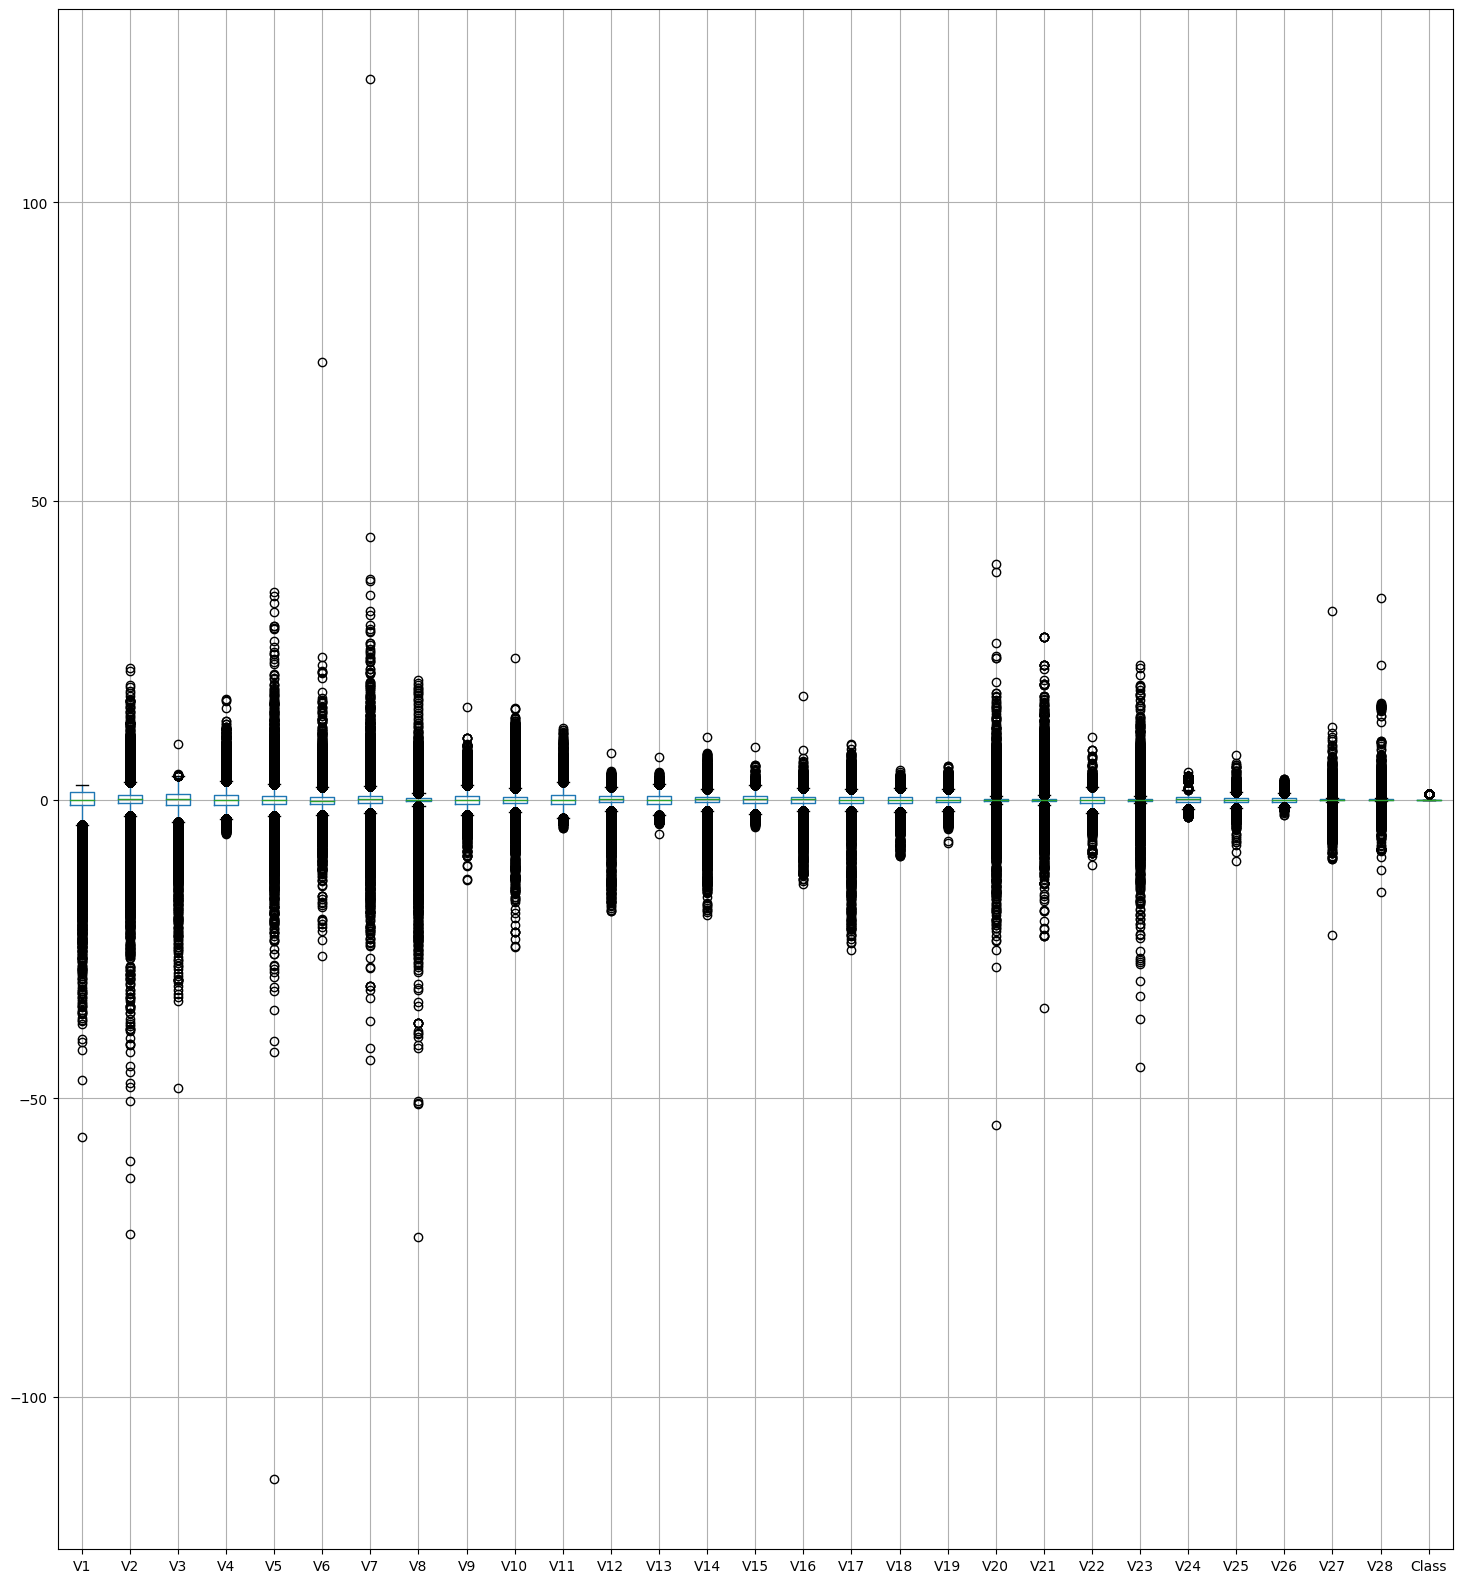

In [ ]:
# boxplot to compare the range of each feature (excluding `Amount`) becoz it will affect the other boxplots
# to check for outliers
df.loc[:, ~df.columns.isin(["Amount"])].boxplot(figsize=(18, 20))

<Axes: >

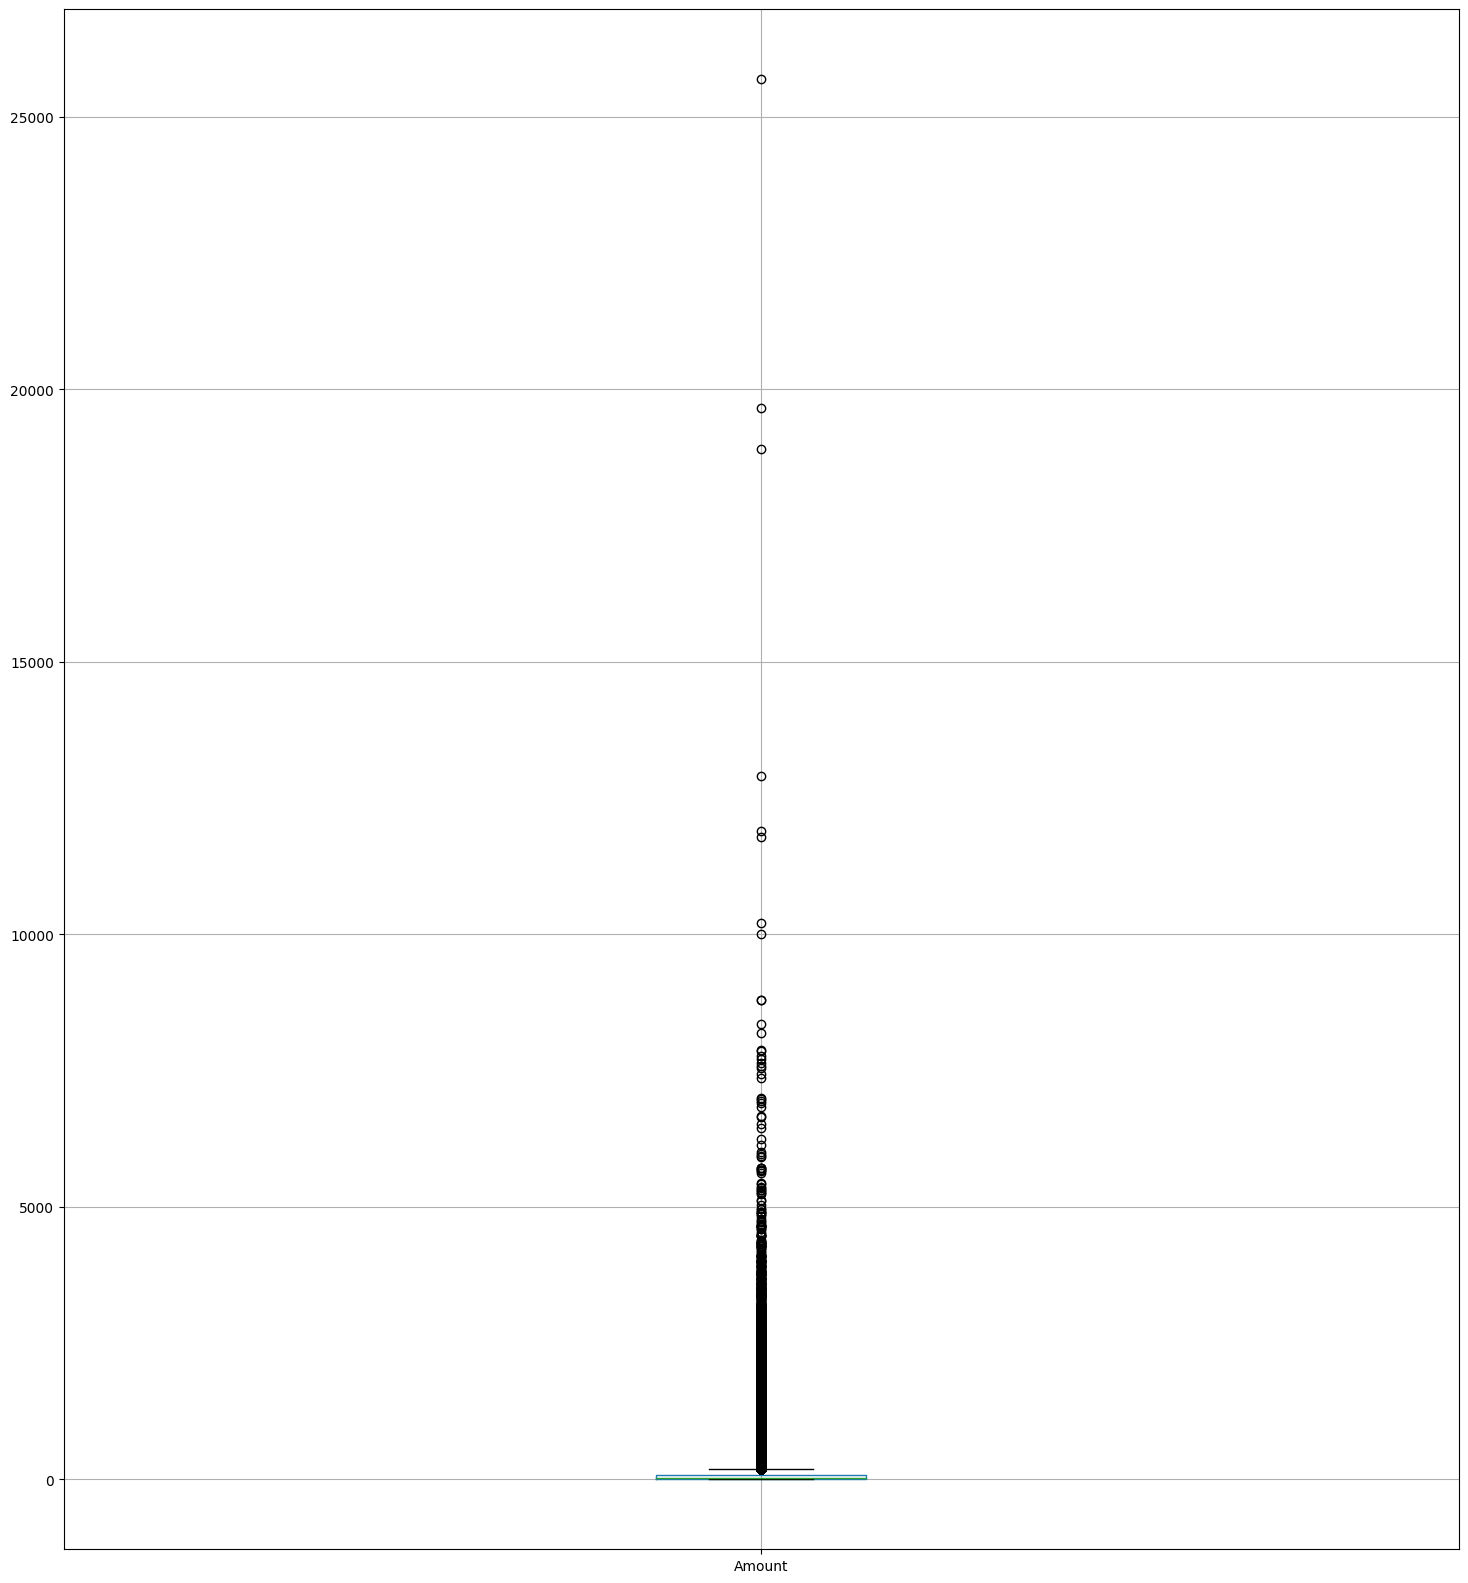

In [ ]:
# boxplot for the attribute `Amount`
df.loc[:, df.columns.isin(["Amount"])].boxplot(figsize=(18, 20))

From the boxplots above, for features `V1` until `V28`, there are quite many outliers, it is impossible to just remove all of them. They might be crucial for determining whether it is fraudulent. We get all the outliers and categorize them based on the class.

In [ ]:
def analyze_outliers_IQR(df, feature_name):
    q1=df[feature_name].quantile(0.25)
    q3=df[feature_name].quantile(0.75)
    IQR=q3-q1
    outliers_samples = df[(df[feature_name]<(q1-1.5*IQR))| (df[feature_name]>(q3+1.5*IQR))]
    print("number of outliers = ", len(outliers_samples[feature_name]))
    print("max outlier value: ", outliers_samples[feature_name].max())
    print("min outlier value:", outliers_samples[feature_name].min())
    class0_outliers_count = len(outliers_samples[outliers_samples["Class"] == 0])
    class1_outliers_count = len(outliers_samples[outliers_samples["Class"] == 1])
    print("% of Fraudulent transactions in outliers = ", class1_outliers_count/(class0_outliers_count+class1_outliers_count))
    print("% of Normal transactions in outliers = ", class0_outliers_count/(class0_outliers_count+class1_outliers_count))

In [ ]:
features = ["V" + str(i) for i in range(1, 29)]
for i in range(28):
    print("For ", features[i], ": ")
    analyze_outliers_IQR(df[[features[i], "Class"]], features[i])
    print()

print("For Amount:")
analyze_outliers_IQR(df[["Amount", "Class"]], "Amount")

For  V1 : 
number of outliers =  7062
max outlier value:  -4.27462768510267
min outlier value: -56.407509631329
% of Fraudulent transactions in outliers =  0.02463891248937978
% of Normal transactions in outliers =  0.9753610875106202

For  V2 : 
number of outliers =  13526
max outlier value:  22.0577289904909
min outlier value: -72.7157275629303
% of Fraudulent transactions in outliers =  0.018187195031790625
% of Normal transactions in outliers =  0.9818128049682093

For  V3 : 
number of outliers =  3363
max outlier value:  9.38255843282114
min outlier value: -48.3255893623954
% of Fraudulent transactions in outliers =  0.0927743086529884
% of Normal transactions in outliers =  0.9072256913470116

For  V4 : 
number of outliers =  11148
max outlier value:  16.8753440335975
min outlier value: -5.68317119816995
% of Fraudulent transactions in outliers =  0.02852529601722282
% of Normal transactions in outliers =  0.9714747039827771

For  V5 : 
number of outliers =  12295
max outlier val

It seems like `V11` is the most important feature for determining whether it is fraudulent, because of its highest %.

# Data Preprocessing

## Data Cleaning

### Removing duplicated rows

In [ ]:
# before removing duplicated rows
print(df.shape)
df["Class"].value_counts()

(284807, 31)


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# removal of duplicated rows
df = df.drop_duplicates()
print("Shape of df after dropping duplicated rows = ", df.shape)
df["Class"].value_counts()

Shape of df after dropping duplicated rows =  (283726, 31)


0    283253
1       473
Name: Class, dtype: int64

### Removing Outliers

For each of the feature, we are going to drop the outliers that belong to class 0. The reason of not dropping the outliers that belong to class 1 is because the task is about fraud detection, those outliers could represent the fraudulent transactions.

In [ ]:
print("Original shape of the dataset = ", df.shape)

Original shape of the dataset =  (283726, 31)


In [ ]:
def drop_Class0_outliers_IQR(df, feature_name):
    q1=df[feature_name].quantile(0.25)
    q3=df[feature_name].quantile(0.75)
    IQR=q3-q1
    outliers_samples = df[(df[feature_name]<(q1-1.5*IQR))| (df[feature_name]>(q3+1.5*IQR))]
    outliers_class0_index = outliers_samples[outliers_samples["Class"] == 0].index
    dropped_df = df.drop(outliers_class0_index)
    print(f"Dropped {str(len(df) - len(dropped_df))} rows!")
    return dropped_df

In [ ]:
for attribute in df.columns:
    print(f"Dropping the outliers that belong to class 0 for the attribute {attribute}...")
    df = drop_Class0_outliers_IQR(df, attribute)

Dropping the outliers that belong to class 0 for the attribute Time...
Dropped 0 rows!
Dropping the outliers that belong to class 0 for the attribute V1...
Dropped 6790 rows!
Dropping the outliers that belong to class 0 for the attribute V2...
Dropped 8272 rows!
Dropping the outliers that belong to class 0 for the attribute V3...
Dropped 1002 rows!
Dropping the outliers that belong to class 0 for the attribute V4...
Dropped 10022 rows!
Dropping the outliers that belong to class 0 for the attribute V5...
Dropped 8015 rows!
Dropping the outliers that belong to class 0 for the attribute V6...
Dropped 13597 rows!
Dropping the outliers that belong to class 0 for the attribute V7...
Dropped 2530 rows!
Dropping the outliers that belong to class 0 for the attribute V8...
Dropped 14887 rows!
Dropping the outliers that belong to class 0 for the attribute V9...
Dropped 5586 rows!
Dropping the outliers that belong to class 0 for the attribute V10...
Dropped 7869 rows!
Dropping the outliers that be

In [ ]:
print("The shape of the dataset after dropping the outliers that belong to class 0 for each attribute = ", df.shape)

The shape of the dataset after dropping the outliers that belong to class 0 for each attribute =  (111090, 31)


From the frequency of each class, we can see that all the fraudulent transactions are still kept, but not for the outliers that belong to normal transactions (class 0).

In [ ]:
df["Class"].value_counts()

0    110617
1       473
Name: Class, dtype: int64

## Feature Engineering

### Feature selection

Feature selection techniques find the best set of features by dropping some of the existing features.  Our group is proposing correlation coefficient and variance thresholding to filter out some of the features based on our assumptions (All features must have variance greater than 0.1). We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = df.drop(columns=["Class"])
y = df["Class"]
selector = VarianceThreshold(threshold=0.1)
X_variance_thresholded = selector.fit_transform(X)
X_variance_thresholded

array([[ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.67170404e-01,  1.25894532e-01,  2.69000000e+00],
       [ 2.00000000e+00, -4.25965884e-01,  9.60523045e-01, ...,
        -2.32793817e-01,  1.05914779e-01,  3.67000000e+00],
       [ 4.00000000e+00,  1.22965763e+00,  1.41003507e-01, ...,
         7.50136936e-01, -2.57236846e-01,  4.99000000e+00],
       ...,
       [ 1.72782000e+05, -2.41922924e-01,  7.12246532e-01, ...,
        -5.59238174e-01,  1.13144397e-01,  5.49000000e+00],
       [ 1.72784000e+05,  2.03955977e+00, -1.75233101e-01, ...,
        -3.15609897e-01,  2.01114370e-01,  2.68000000e+00],
       [ 1.72785000e+05,  1.20316380e-01,  9.31005133e-01, ...,
        -4.35870086e-01,  1.24078875e-01,  2.69000000e+00]])

### Feature extraction

Feature extraction techniques produce new features which are a linear combination of the original input features, and our group is proposing Principal Component Analysis (PCA) for dimensionality reduction.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  # for visualization purposes, in terms of 2D scatterplot
X_pca = pca.fit_transform(X=X_variance_thresholded)

# Store as dataframe and print
X_pca = pd.DataFrame(X_pca)
print(X_pca.shape)  #> ((110052, 24))
X_pca.round(2).head()

(111090, 2)


,0,1
0,95291.09,-29.60
1,95289.09,-28.62
2,95287.09,-27.29
3,95282.09,-28.61
4,95281.09,89.23


In [ ]:
X_pca.var()

0    2.179968e+09
1    1.450604e+03
dtype: float64

In [ ]:
print(pca.explained_variance_ratio_.round(4)[:10])

[1. 0.]


Based on the results above, the PC1 contributed 99.01%, the PC2 contributed 0.17% and so on. The further you go, the lesser is the contribution to the total variance.

Plot the scatterplot to see if there is a clear distinction after applying PCA:

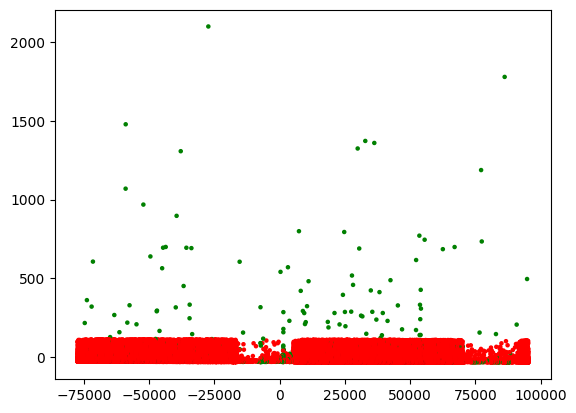

In [ ]:
import numpy as np
colormap = np.array(['r', 'g'])
plt.scatter(X_pca[0], X_pca[1], s=5, c=colormap[y])
plt.show()

# Handling Imbalanced Dataset

In [ ]:
from IPython.display import display
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Print the shape of the original dataset
print("Original dataset shape:", X_pca.shape)

# Initialize the RandomOverSampler object
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_pca, y)
print("Oversampled dataset shape:", X_ros.shape)

# Display the oversampled dataset
print("Oversampled dataset (first 5 samples):")
display(pd.DataFrame(X_ros).head())
display(pd.Series(y_ros).value_counts())

# Initialize the RandomUnderSampler object
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X_pca, y)
print("Undersampled dataset shape:", X_rus.shape)

# Display the undersampled dataset
print("Undersampled dataset (first 5 samples):")
display(pd.DataFrame(X_rus).head())
display(pd.Series(y_rus).value_counts())

# Initialize the SMOTE object
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_pca, y)
print("SMOTE dataset shape:", X_smote.shape)

# Display the SMOTE dataset
print("SMOTE dataset (first 5 samples):")
display(pd.DataFrame(X_smote).head())
display(pd.Series(y_smote).value_counts())

# Now, X_ros, y_ros are the oversampled features and labels,
# X_rus, y_rus are the undersampled features and labels,
# X_smote, y_smote are the features and labels after applying SMOTE.

# The "API" for oversampling is represented by the use of RandomOverSampler.
# The "API" for undersampling is represented by the use of RandomUnderSampler.
# The "API" for SMOTE is represented by the use of SMOTE.


Original dataset shape: (111090, 2)
Oversampled dataset shape: (221234, 2)
Oversampled dataset (first 5 samples):


,0,1
0,95291.085855,-29.595775
1,95289.085905,-28.621112
2,95287.085911,-27.290510
3,95282.085896,-28.613358
4,95281.089494,89.233145


0    110617
1    110617
Name: Class, dtype: int64

Undersampled dataset shape: (946, 2)
Undersampled dataset (first 5 samples):


,0,1
0,63517.085915,-27.997159
1,19511.086297,-15.134180
2,57511.086731,-1.123349
3,16979.085944,-27.206087
4,92114.085833,-30.397611


0    473
1    473
Name: Class, dtype: int64

SMOTE dataset shape: (221234, 2)
SMOTE dataset (first 5 samples):


,0,1
0,95291.085855,-29.595775
1,95289.085905,-28.621112
2,95287.085911,-27.290510
3,95282.085896,-28.613358
4,95281.089494,89.233145


0    110617
1    110617
Name: Class, dtype: int64


# Model Training and Evaluation (Random Forest Classifier)

Import Relevant Packages

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

Splitting the Data

In [ ]:
# Split the data into training and test sets for oversample dataset
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.2)

# Split the data into training and test sets for undersample dataset
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.2)

# Split the data into training and test sets for SMOTE dataset
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2)

Fitting and Evaluating the Model

In [ ]:
#creating model for oversampling dataset
rf_ros = RandomForestClassifier()
rf_ros.fit(X_ros_train, y_ros_train)

#creating model for undersampling dataset
rf_rus = RandomForestClassifier()
rf_rus.fit(X_rus_train, y_rus_train)

#creating model for smote dataset
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier()

Making predictions using the trained models

In [ ]:

y_pred_ros = rf_ros.predict(X_ros_test)

y_pred_rus = rf_rus.predict(X_rus_test)

y_pred_smote = rf_smote.predict(X_smote_test)

Evaluating the results

Text(0.5, 1.0, 'Confusion Matrix of SMOTE dataset')

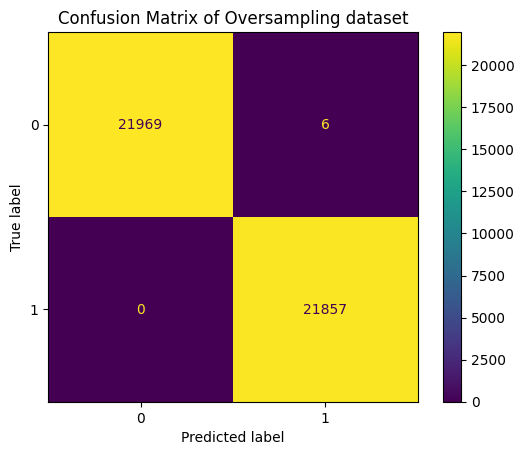

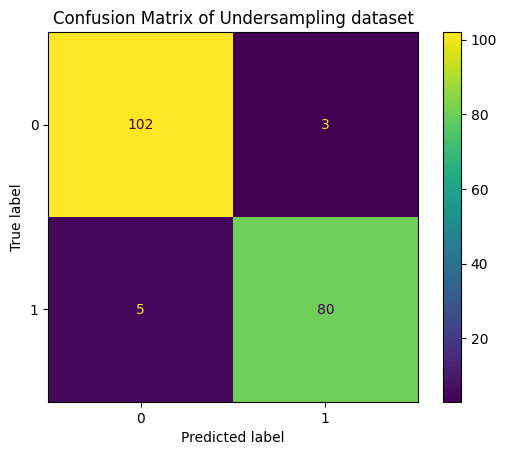

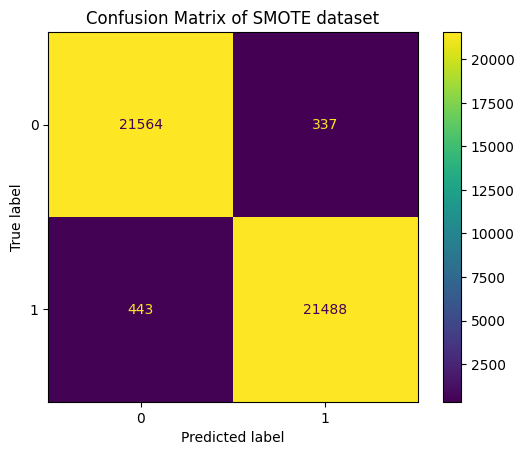

In [ ]:
# Create the confusion matrix for oversampling dataset
cm_ros = confusion_matrix(y_ros_test, y_pred_ros)

disp_ros = ConfusionMatrixDisplay(confusion_matrix= cm_ros).plot();

# Set the title
title = "Confusion Matrix of Oversampling dataset"
disp_ros.ax_.set_title(title)

# Create the confusion matrix for undersampling dataset
cm_rus = confusion_matrix(y_rus_test, y_pred_rus)

disp_rus = ConfusionMatrixDisplay(confusion_matrix= cm_rus).plot();

# Set the title
title = "Confusion Matrix of Undersampling dataset"
disp_rus.ax_.set_title(title)


# Create the confusion matrix for smote dataset
cm_smote = confusion_matrix(y_smote_test, y_pred_smote)

disp_smote = ConfusionMatrixDisplay(confusion_matrix= cm_smote).plot();

# Set the title
title = "Confusion Matrix of SMOTE dataset"
disp_smote.ax_.set_title(title)


Visualisation of trees

1. Oversampling dataset

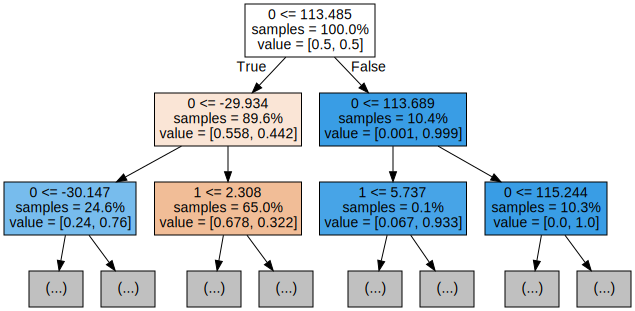

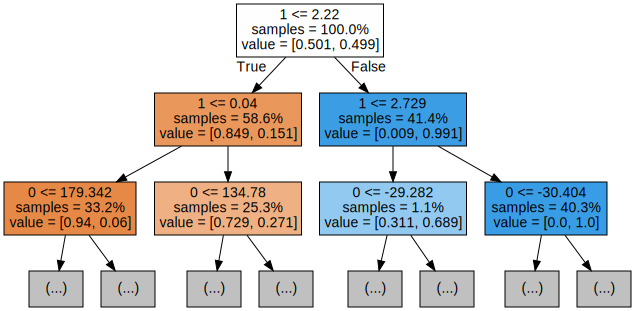

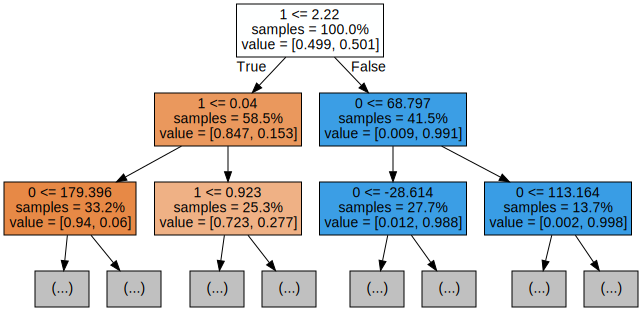

In [ ]:
# Export the first three decision trees from the oversampling forest

for i in range(3):
    tree = rf_ros.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_ros_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

2. Undersampling dataset

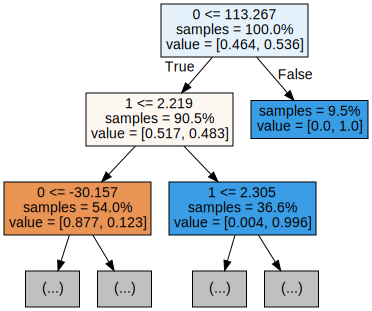

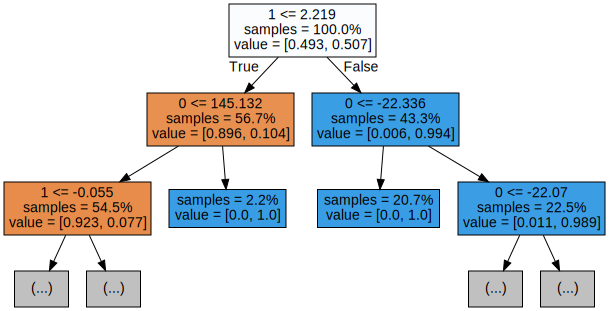

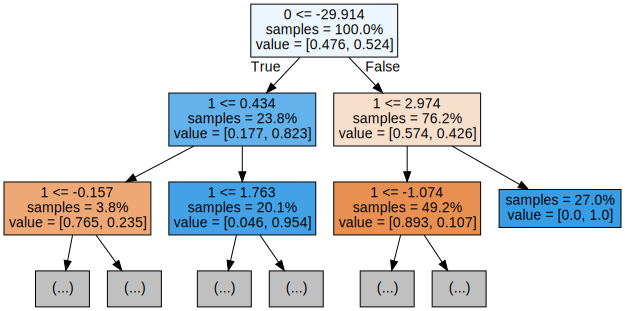

In [ ]:
# Export the first three decision trees from the undersampling forest

for i in range(3):
    tree = rf_rus.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_rus_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

3. SMOTE dataset

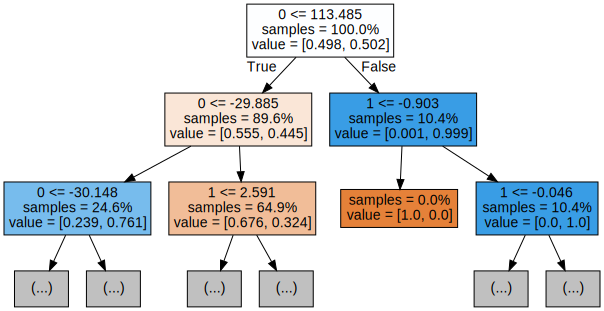

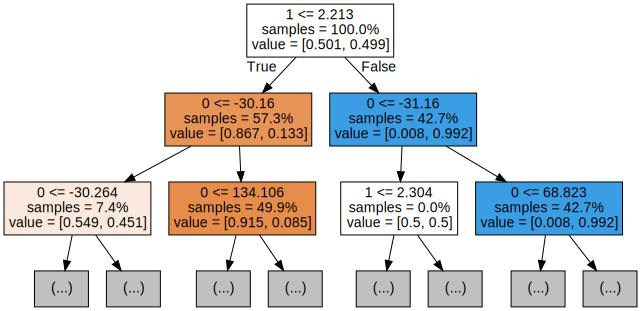

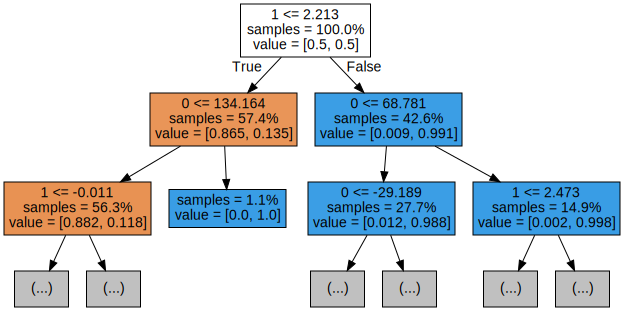

In [ ]:
# Export the first three decision trees from the smote forest

for i in range(3):
    tree = rf_smote.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_smote_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Hyperparameter tuning

In [ ]:
from sklearn.metrics import make_scorer, precision_score
param_dist = {'n_estimators': [50, 100, 150, 250, 300],
              'max_depth':[4, 8, 12, 16 ,20]}

# Create a random forest classifier
rf = RandomForestClassifier()


# Define the scoring metric
scoring_metric = make_scorer(precision_score)

# Use random search to find the best hyperparameters with precision as the scoring metric
rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=3,
                                 scoring=scoring_metric)

# Fit the random search object to the data
rand_search.fit(X_ros_train, y_ros_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [4, 8, 12, 16, 20],
                                        'n_estimators': [50, 100, 150, 250,
                                                         300]},
                   scoring=make_scorer(precision_score))

In [ ]:
# Create a variable for the best model
best_rf_ros = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 250, 'max_depth': 20}


In [ ]:
from sklearn.metrics import make_scorer, precision_score
param_dist = {'n_estimators': [50, 100, 150, 250, 300],
              'max_depth':[4, 8, 12, 16 ,20]}

# Create a random forest classifier
rf = RandomForestClassifier()


# Define the scoring metric
scoring_metric = make_scorer(precision_score)

# Use random search to find the best hyperparameters with precision as the scoring metric
rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=3,
                                 scoring=scoring_metric)

# Fit the random search object to the data
rand_search.fit(X_rus_train, y_rus_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [4, 8, 12, 16, 20],
                                        'n_estimators': [50, 100, 150, 250,
                                                         300]},
                   scoring=make_scorer(precision_score))

In [ ]:
# Create a variable for the best model
best_rf_rus = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 250, 'max_depth': 4}


In [ ]:
from sklearn.metrics import make_scorer, precision_score
param_dist = {'n_estimators': [50, 100, 150, 250, 300],
              'max_depth':[4, 8, 12, 16 ,20]}

# Create a random forest classifier
rf = RandomForestClassifier()


# Define the scoring metric
scoring_metric = make_scorer(precision_score)

# Use random search to find the best hyperparameters with precision as the scoring metric
rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=3,
                                 scoring=scoring_metric)

# Fit the random search object to the data
rand_search.fit(X_smote_train, y_smote_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [4, 8, 12, 16, 20],
                                        'n_estimators': [50, 100, 150, 250,
                                                         300]},
                   scoring=make_scorer(precision_score))

In [ ]:
# Create a variable for the best model
best_rf_smote = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 100, 'max_depth': 12}


In [ ]:
# Split the data into training and test sets for original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Random Forest classifier for original dataset
rf_ros = RandomForestClassifier(n_estimators=250, max_depth = 20)

rf_rus = RandomForestClassifier(n_estimators=250, max_depth = 4)

rf_smote = RandomForestClassifier(n_estimators=100, max_depth = 12)

rf_ori_ros = RandomForestClassifier(n_estimators=250, max_depth = 20)

rf_ori_rus = RandomForestClassifier(n_estimators=250, max_depth = 4)

rf_ori_smote = RandomForestClassifier(n_estimators=100, max_depth = 12)

rf_ori_ros.fit(X_train, y_train)

rf_ori_rus.fit(X_train, y_train)

rf_ori_smote.fit(X_train, y_train)

rf_rus.fit(X_ros_train, y_ros_train)

rf_ros.fit(X_rus_train, y_rus_train)

rf_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_depth=12)

In [ ]:
print(X_train.shape)

(88041, 29)


In [ ]:


# Generate predictions with the best model for oversampling on oversampling dataset
y_pred_ros = rf_ros.predict(X_ros_test)

# Generate predictions with the best model for oversampling on undersampling dataset
y_pred_rus = rf_rus.predict(X_rus_test)

# Generate predictions with the best model for oversampling on smote dataset
y_pred_smote = rf_smote.predict(X_smote_test)

# Generate predictions with the best model for oversampling on original dataset
y_pred_ros_ori = rf_ori_ros.predict(X_test)

# Generate predictions with the best model for oversampling on original dataset
y_pred_rus_ori = rf_ori_rus.predict(X_test)

# Generate predictions with the best model for oversampling on original dataset
y_pred_smote_ori = rf_ori_smote.predict(X_test)


Text(0.5, 1.0, 'Confusion Matrix of original dataset sing hyparameter of smote')

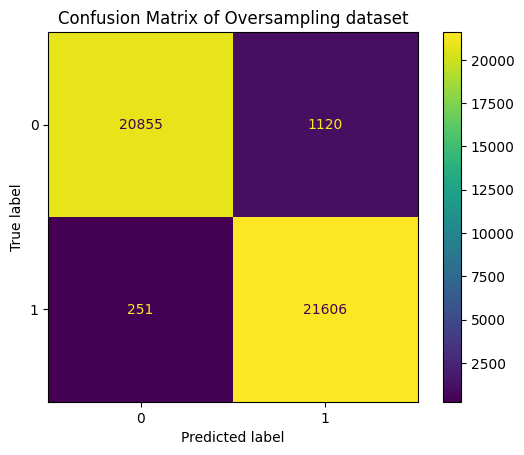

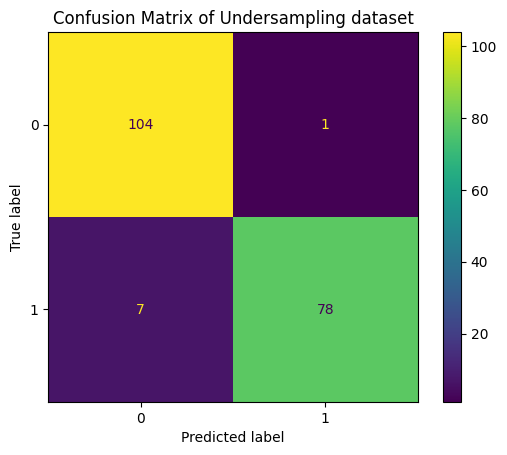

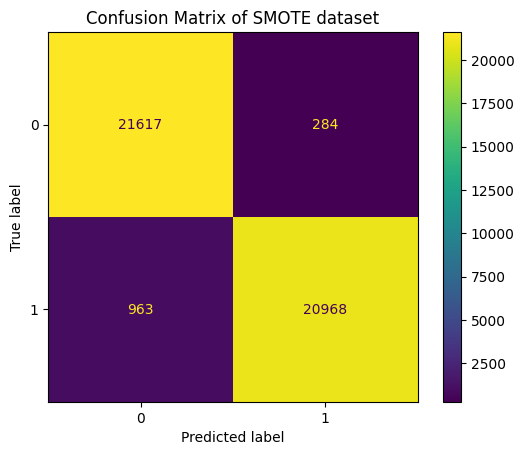

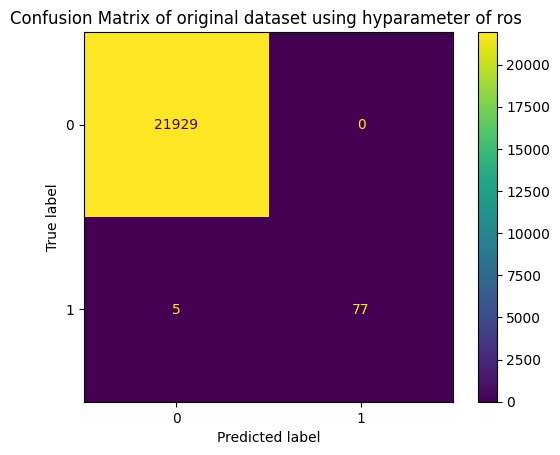

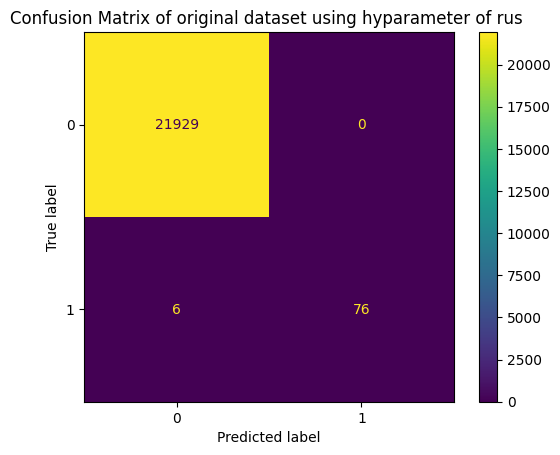

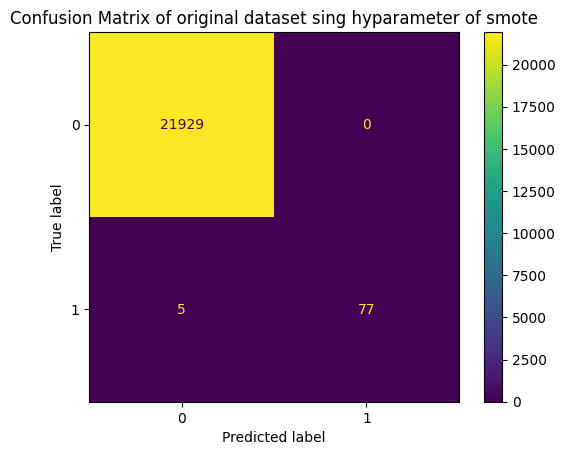

In [ ]:
# Create the confusion matrix for oversampling dataset
cm_ros = confusion_matrix(y_ros_test, y_pred_ros)

disp_ros = ConfusionMatrixDisplay(confusion_matrix= cm_ros).plot();

# Set the title
title = "Confusion Matrix of Oversampling dataset"
disp_ros.ax_.set_title(title)

# Create the confusion matrix for undersampling dataset
cm_rus = confusion_matrix(y_rus_test, y_pred_rus)

disp_rus = ConfusionMatrixDisplay(confusion_matrix= cm_rus).plot();

# Set the title
title = "Confusion Matrix of Undersampling dataset"
disp_rus.ax_.set_title(title)


# Create the confusion matrix for smote dataset
cm_smote = confusion_matrix(y_smote_test, y_pred_smote)

disp_smote = ConfusionMatrixDisplay(confusion_matrix= cm_smote).plot();

# Set the title
title = "Confusion Matrix of SMOTE dataset"
disp_smote.ax_.set_title(title)


# Create the confusion matrix for original dataset using hyparameter of ros
cm_ori = confusion_matrix(y_test, y_pred_ros_ori)

disp_smote = ConfusionMatrixDisplay(confusion_matrix= cm_ori).plot();

# Set the title
title = "Confusion Matrix of original dataset using hyparameter of ros "
disp_smote.ax_.set_title(title)

# Create the confusion matrix for original dataset using hyparameter of rus
cm_ori = confusion_matrix(y_test, y_pred_rus_ori)

disp_smote = ConfusionMatrixDisplay(confusion_matrix= cm_ori).plot();

# Set the title
title = "Confusion Matrix of original dataset using hyparameter of rus "
disp_smote.ax_.set_title(title)

# Create the confusion matrix for original dataset using hyparameter of smote
cm_ori = confusion_matrix(y_test, y_pred_smote_ori)

disp_smote = ConfusionMatrixDisplay(confusion_matrix= cm_ori).plot();

# Set the title
title = "Confusion Matrix of original dataset sing hyparameter of smote"
disp_smote.ax_.set_title(title)

In [ ]:
import pickle

# Split the data into training and test sets for original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Random Forest classifier for original dataset
best_model = RandomForestClassifier(n_estimators=100, max_depth = 12)


In [ ]:
best_model.fit(X_train, y_train)

with open(file_path, 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
# Generate predictions with the best model for oversampling on oversampling dataset
y_pred_best = best_model.predict(X_test)


Text(0.5, 1.0, 'Confusion Matrix of Best Model')

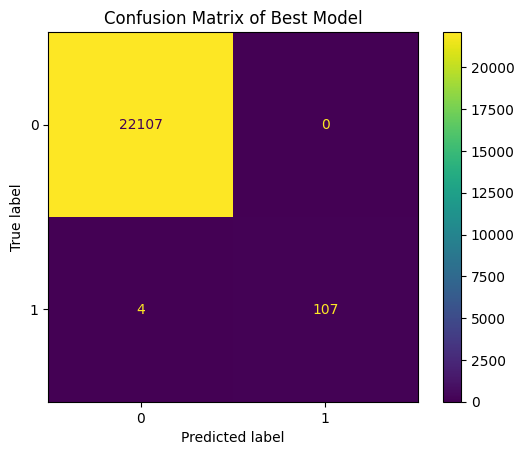

In [ ]:
# Create the confusion matrix for oversampling dataset
cm_best = confusion_matrix(y_test, y_pred_best)

disp_ros = ConfusionMatrixDisplay(confusion_matrix= cm_best).plot();

# Set the title
title = "Confusion Matrix of Best Model"
disp_ros.ax_.set_title(title)



In [ ]:
import pickle

with open(file_path, 'rb') as file:
    best_model = pickle.load(file)

In [ ]:
row_zero = X_test.iloc[0].to_numpy()
row_one = X_test.iloc[1].to_numpy()
row_two = X_test.iloc[2].to_numpy()
row_three = X_test.iloc[3].to_numpy()

In [ ]:
row_zero = row_zero.reshape(1,-1)
row_one = row_one.reshape(1,-1)
row_two = row_two.reshape(1,-1)
row_three = row_three.reshape(1,-1)

In [ ]:
print(row_zero)
print(row_one)
print(row_two)
print(row_three)


[[ 7.13200000e+04 -1.11807097e+00  8.44891388e-01  1.25203409e+00
   3.09505693e-02 -1.69847008e-01  7.05091649e-01  1.78535216e-01
   7.71639556e-01 -4.53669067e-01 -7.21541077e-01  1.04548842e+00
   7.36464770e-01 -9.37795070e-01  5.27501672e-01 -5.61788737e-01
  -6.45170298e-01  5.72838261e-01 -8.06981913e-01 -1.06168414e-02
  -2.72089136e-01  1.39648393e-02  1.34968562e-02  4.61844262e-03
  -2.79338596e-01 -2.35988823e-01  2.61454748e-01 -1.42081982e-01
   1.16099020e-02  4.90000000e+01]]
[[ 1.21627000e+05 -6.22464564e-01 -5.36620182e-01  9.44414672e-01
  -1.71618779e+00  7.60089831e-01 -6.09566633e-01  4.53951500e-01
  -2.24579411e-01 -1.09203837e+00  2.12957659e-01 -6.72762851e-02
   3.06159199e-01  9.07604814e-02 -3.00809936e-01 -2.11237274e+00
  -1.55976807e+00 -5.48603087e-01  1.43247859e+00 -8.21187678e-01
  -3.21820098e-01 -1.93997518e-01  3.67996090e-02 -2.16947317e-01
  -3.02900597e-01  1.99112593e-02  6.13938866e-01 -1.20093813e-01
  -9.73947271e-02  2.95000000e+01]]
[[ 1

In [ ]:
print(best_model.predict(row_zero))
print(best_model.predict(row_one))
print(best_model.predict(row_two))
print(best_model.predict(row_three))


[0]
[0]
[0]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
